# Exercícios Práticos

Crie um dataframe único com a informação do GDP e quantidade de matrículas por nível de educação por ano.

O aumento das matrículas na educação primária, secundária e terciária acompanhou o aumento do GDP per capita nos últimos 15 anos na India?

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
    
educ = 'https://raw.githubusercontent.com/abnr/ml-data/main/SYB61_T07_Education.csv'
gdp = 'https://raw.githubusercontent.com/abnr/ml-data/main/India_World_Bank_Info.csv'
     
df_educ = pd.read_csv(educ, header=1, sep='\t', encoding='unicode_escape')
df_educ.head()


,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN,"United Nations Educational, Scientific and Cul..."
1,1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7,NaN,"United Nations Educational, Scientific and Cul..."


In [10]:
df_gdp = pd.read_csv(gdp, sep='\t', on_bad_lines='error', skiprows=4)
df_gdp.head()


,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,India,IND,"Presence of peace keepers (number of troops, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Intentional homicides (per 100,000 people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.842386,3.773790,3.774227,3.819646,3.758949,3.588249,3.660058,3.390616,3.223699,NaN
2,India,IND,"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.672067,4.441221,4.477722,4.468985,4.431416,4.218435,4.333956,4.020842,3.735951,NaN
3,India,IND,"Intentional homicides, female (per 100,000 fem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.948596,3.054638,3.016158,3.119986,3.034514,2.909561,2.934533,2.712336,2.672389,NaN
4,India,IND,"Internally displaced persons, total displaced ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500000.000000,650000.000000,650000.000000,1000000.000000,526000.000000,854000.000000,612000.000000,796000.000000,806000.0


In [11]:
df_educ['Series'].unique()


array(['Students enrolled in primary education (thousands)',
       'Gross enrollement ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in secondary education (thousands)',
       'Gross enrollment ratio - Secondary (male)',
       'Gross enrollment ratio - Secondary (female)',
       'Students enrolled in tertiary education (thousands)',
       'Gross enrollment ratio - Tertiary (male)',
       'Gross enrollment ratio - Tertiary (female)'], dtype=object)

In [12]:
df_educ_nivel_estudo = df_educ[(df_educ['Unnamed: 1'] == 'India') & (
    (df_educ['Series'] == 'Students enrolled in primary education (thousands)') |\
    (df_educ['Series'] == 'Students enrolled in secondary education (thousands)') |\
    (df_educ['Series'] == 'Students enrolled in tertiary education (thousands)') )
]

df_educ_nivel_estudo.head()


,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
3729,356,India,2003,Students enrolled in primary education (thousa...,"125,569",NaN,"United Nations Educational, Scientific and Cul..."
3732,356,India,2003,Students enrolled in secondary education (thou...,"81,050",NaN,"United Nations Educational, Scientific and Cul..."
3735,356,India,2003,Students enrolled in tertiary education (thous...,"11,295",NaN,"United Nations Educational, Scientific and Cul..."
3738,356,India,2005,Students enrolled in secondary education (thou...,"89,462",NaN,"United Nations Educational, Scientific and Cul..."
3741,356,India,2005,Students enrolled in tertiary education (thous...,"11,777",NaN,"United Nations Educational, Scientific and Cul..."


In [13]:
df_gdp[(df_gdp['Indicator Name'].str.contains('GDP')) & (
    ~df_gdp['Indicator Name'].str.contains('% of GDP'))]['Indicator Name'].unique()


array(['Price level ratio of PPP conversion factor (GDP) to market exchange rate',
       '2005 PPP conversion factor, GDP (LCU per international $)',
       'PPP conversion factor, GDP (LCU per international $)',
       'Claims on central government, etc. (% GDP)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP per capita (constant LCU)',
       'GDP per capita growth (annual %)',
       'GDP per capita (constant 2010 US$)',
       'GDP per capita (current LCU)', 'GDP per capita (current US$)',
       'GDP, PPP (constant 2011 international $)',
       'GDP, PPP (current international $)', 'GDP (constant LCU)',
       'GDP growth (annual %)', 'GDP (constant 2010 US$)',
       'GDP: linked series (current LCU)', 'GDP (current LCU)',
       'GDP (current US$)',
       'Discrepancy in expenditure estimate of GDP (constant LCU)',
       'Discrepancy in expenditure estimate of GDP (current LCU)',
       'GDP 

In [14]:
df_gdp_Indicator_Name_index = df_gdp.set_index('Indicator Name')
df_gdp_Indicator_Name_index.head()


,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Presence of peace keepers (number of troops, police, and military observers in mandate)",India,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Intentional homicides (per 100,000 people)",India,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.842386,3.773790,3.774227,3.819646,3.758949,3.588249,3.660058,3.390616,3.223699,NaN
"Intentional homicides, male (per 100,000 male)",India,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.672067,4.441221,4.477722,4.468985,4.431416,4.218435,4.333956,4.020842,3.735951,NaN
"Intentional homicides, female (per 100,000 female)",India,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.948596,3.054638,3.016158,3.119986,3.034514,2.909561,2.934533,2.712336,2.672389,NaN
"Internally displaced persons, total displaced by conflict and violence (number of people)",India,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500000.000000,650000.000000,650000.000000,1000000.000000,526000.000000,854000.000000,612000.000000,796000.000000,806000.0


In [15]:
df_gdp_Indicator_Name_index_melted = df_gdp_Indicator_Name_index.loc[['GDP per capita (current US$)']].melt(
    id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP per capita (USD)')

df_gdp_Indicator_Name_index_melted.head()


,Country Name,Country Code,Year,GDP per capita (USD)
0,India,IND,1960,81.284764
1,India,IND,1961,84.426437
2,India,IND,1962,88.914919
3,India,IND,1963,100.048592
4,India,IND,1964,114.315161


In [16]:
df_gdp_por_ano = df_gdp_Indicator_Name_index_melted.drop(
    columns=['Country Name','Country Code'])

df_gdp_por_ano.head()


,Year,GDP per capita (USD)
0,1960,81.284764
1,1961,84.426437
2,1962,88.914919
3,1963,100.048592
4,1964,114.315161


In [17]:
df_educ_nivel_estudo_tratada = df_educ_nivel_estudo.drop(columns=['Region/Country/Area', 'Unnamed: 1', 'Footnotes', 'Source'])

df_gdp_por_ano.info()
df_educ_nivel_estudo_tratada.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  58 non-null     object 
 1   GDP per capita (USD)  58 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


,Year,Series,Value
3729,2003,Students enrolled in primary education (thousa...,"125,569"
3732,2003,Students enrolled in secondary education (thou...,"81,050"
3735,2003,Students enrolled in tertiary education (thous...,"11,295"
3738,2005,Students enrolled in secondary education (thou...,"89,462"
3741,2005,Students enrolled in tertiary education (thous...,"11,777"


In [18]:
df_gdp_por_ano = df_gdp_por_ano.astype({'Year': 'int64'})

df_gdp_por_ano.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  58 non-null     int64  
 1   GDP per capita (USD)  58 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [19]:
df_total_data = pd.merge(left=df_gdp_por_ano, right=df_educ_nivel_estudo_tratada, 
    on="Year", how="inner")

df_total_data


,Year,GDP per capita (USD),Series,Value
0,2003,541.135228,Students enrolled in primary education (thousa...,"125,569"
1,2003,541.135228,Students enrolled in secondary education (thou...,"81,050"
2,2003,541.135228,Students enrolled in tertiary education (thous...,"11,295"
3,2005,707.008019,Students enrolled in secondary education (thou...,"89,462"
4,2005,707.008019,Students enrolled in tertiary education (thous...,"11,777"
5,2010,1345.770153,Students enrolled in primary education (thousa...,"138,414"
6,2010,1345.770153,Students enrolled in secondary education (thou...,"107,687"
7,2010,1345.770153,Students enrolled in tertiary education (thous...,"20,741"
8,2014,1576.004018,Students enrolled in primary education (thousa...,"137,809"
9,2014,1576.004018,Students enrolled in secondary education (thou...,"129,439"


In [20]:
df_total_data.replace(',','', regex=True, inplace=True)

df_total_data.info()
df_total_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  17 non-null     int64  
 1   GDP per capita (USD)  17 non-null     float64
 2   Series                17 non-null     object 
 3   Value                 17 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 672.0+ bytes


,Year,GDP per capita (USD),Series,Value
0,2003,541.135228,Students enrolled in primary education (thousa...,125569
1,2003,541.135228,Students enrolled in secondary education (thou...,81050
2,2003,541.135228,Students enrolled in tertiary education (thous...,11295
3,2005,707.008019,Students enrolled in secondary education (thou...,89462
4,2005,707.008019,Students enrolled in tertiary education (thous...,11777
5,2010,1345.770153,Students enrolled in primary education (thousa...,138414
6,2010,1345.770153,Students enrolled in secondary education (thou...,107687
7,2010,1345.770153,Students enrolled in tertiary education (thous...,20741
8,2014,1576.004018,Students enrolled in primary education (thousa...,137809
9,2014,1576.004018,Students enrolled in secondary education (thou...,129439


In [21]:
df_total_data_pivot = df_total_data.pivot(columns=['Series'], index=['Year', 'GDP per capita (USD)'], values='Value')
df_total_data_pivot


,Series,Students enrolled in primary education (thousands),Students enrolled in secondary education (thousands),Students enrolled in tertiary education (thousands)
Year,GDP per capita (USD),,,
2003,541.135228,125569,81050,11295
2005,707.008019,NaN,89462,11777
2010,1345.770153,138414,107687,20741
2014,1576.004018,137809,129439,30306
2015,1606.038285,138518,129542,32107
2016,1717.473878,145803,132161,32392


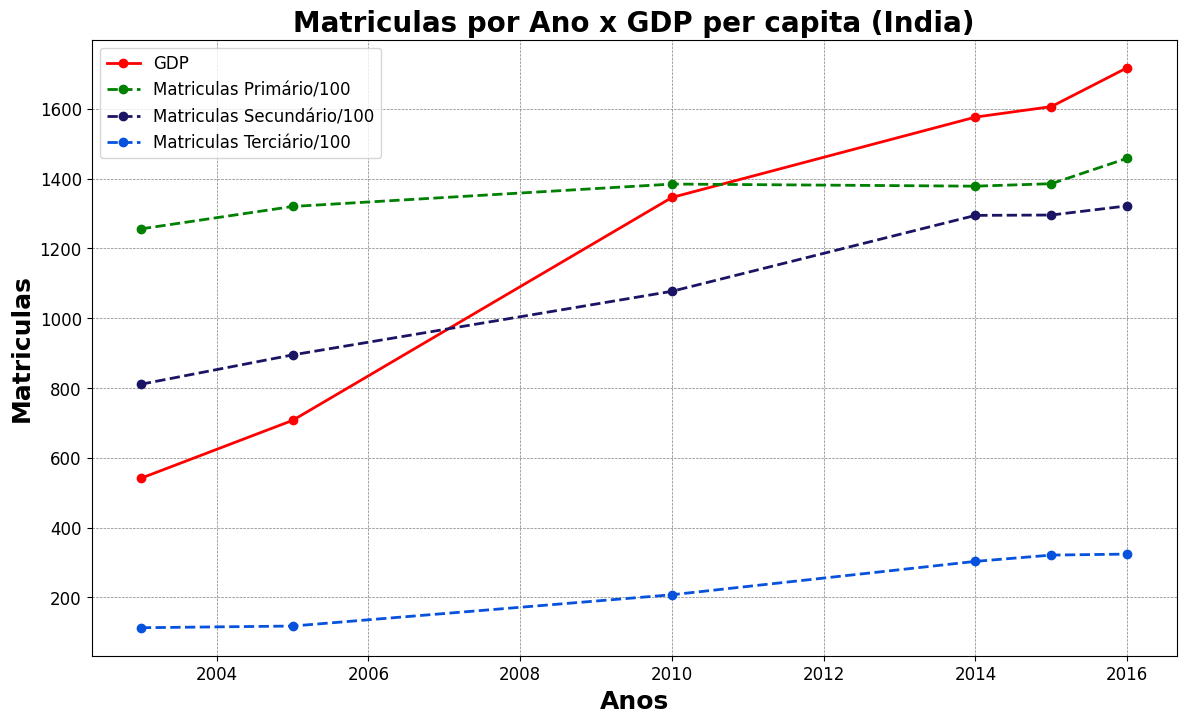

In [23]:
df_dados_plot = df_total_data_pivot.reset_index()

anos = df_dados_plot['Year']
gdp_per_capita = df_dados_plot['GDP per capita (USD)']
primario = (df_dados_plot['Students enrolled in primary education (thousands)'].astype(float).interpolate()/100)
secundario = (df_dados_plot['Students enrolled in secondary education (thousands)'].astype(float)/100)
terciario = (df_dados_plot['Students enrolled in tertiary education (thousands)'].astype(float)/100)

plt.figure(figsize=(14,8))

plt.plot(anos, gdp_per_capita, label='GDP', color='red', linestyle='-', linewidth=2, marker='o')
plt.plot(anos, primario, label='Matriculas Primário/100', color='green', linestyle='--', linewidth=2, marker='o')
plt.plot(anos, secundario, label='Matriculas Secundário/100', color='#1B1464', linestyle='--', linewidth=2, marker='o')
plt.plot(anos, terciario, label='Matriculas Terciário/100', color='#0652DD', linestyle='--', linewidth=2, marker='o')

plt.title("Matriculas por Ano x GDP per capita (India)", fontsize=20, fontweight='bold')
plt.ylabel('Matriculas', fontsize=18, fontweight='bold')
plt.xlabel('Anos', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

plt.legend(loc='upper left', fontsize=12)
plt.show()
